## [**简洁实现**]

高级API包含了前文介绍的所有配置细节，
所以我们可以直接实例化门控循环单元模型。
这段代码的运行速度要快得多，
因为它使用的是编译好的运算符而不是Python来处理之前阐述的许多细节。

In [2]:
import torch
from torch import nn
# from d2l import torch as d2l

import sys
sys.path.append("..")
import d2lzh_pytorch.torch_package  as d2l

# import d2lzh_pytorch.torch as d2l

In [3]:
batch_size = 32
num_steps = 35


train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

download函数将使用 /home/mylady/ai_data/d2l_data/data 作为缓存地址


PermissionError: [Errno 13] Permission denied: '/home/mylady'

In [5]:
vocab_size = len(vocab)
num_hiddens = 256
device = d2l.try_gpu()


num_epochs = 500
lr = 1

In [6]:
num_inputs = vocab_size

gru_layer = nn.GRU(num_inputs, num_hiddens)

model = d2l.RNNModel(gru_layer, len(vocab))
model = model.to(device)

Time consuming:   8.0130 秒
perplexity 1.0, 846952.2 tokens/sec on cuda:0
time travelleryou can show black is white by argument said filby
travelleryou can show black is white by argument said filby


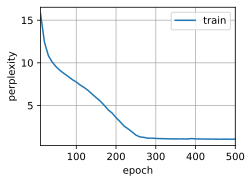

In [7]:
# 训练
d2l.train_ch8(model, 
              train_iter, 
              vocab, 
              lr, 
              num_epochs, 
              device)

## 小结

* 门控循环神经网络可以更好地捕获时间步距离很长的序列上的依赖关系。
* 重置门有助于捕获序列中的短期依赖关系。
* 更新门有助于捕获序列中的长期依赖关系。
* 重置门打开时，门控循环单元包含基本循环神经网络；更新门打开时，门控循环单元可以跳过子序列。

In [ ]:
model.state_dict()